<a href="https://colab.research.google.com/github/academypetrov/curso1/blob/master/proyecto_integrador_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**codigo en python de preprocesamiento de  imagenes de cancer de la piel,  modelo de entrenamiento  y validacion **

**A continuación, te proporcionaré un ejemplo básico de código en Python que muestra el preprocesamiento de imágenes y el entrenamiento y validación de un modelo de aprendizaje automático utilizando la biblioteca TensorFlow y la arquitectura CNN. Este código es un punto de partida y se puede personalizar y mejorar según tus necesidades específicas.**

Antes de ejecutar el código, asegúrate de tener los siguientes pasos:

Organiza tus datos en directorios de entrenamiento y validación, donde cada directorio debe contener subdirectorios separados para cada clase (por ejemplo, "benigno" y "maligno").
Reemplaza 'ruta_directorio_entrenamiento' y 'ruta_directorio_validacion' con las rutas de los directorios que contienen tus datos de entrenamiento y validación, respectivamente.
Asegúrate de tener instaladas las bibliotecas necesarias, como TensorFlow y numpy.
Personaliza la arquitectura del modelo, los parámetros de preprocesamiento y entrenamiento según tus necesidades.
Este código utiliza un generador de imágenes para cargar y preprocesar las imágenes en lotes durante el entrenamiento y la validación. La red neuronal convolucional (CNN) tiene varias capas convolucionales y de pooling, seguidas de capas densas. Se utiliza el optimizador Adam y la función de pérdida de entropía cruzada binaria para compilar el modelo. El entrenamiento se realiza llamando a la función fit() del modelo.




In [23]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Directorios de datos
train_dir = '/content/entrenamiento'
validation_dir = '/content/validacion'

# Parámetros del modelo
input_shape = (150, 150, 3)
batch_size = 32
epochs = 10

# Preprocesamiento de imágenes
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'
)

# Creación del modelo CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Found 52 images belonging to 3 classes.
Found 1 images belonging to 3 classes.
Epoch 1/10
1/1 [==============================] - 7s 7s/step - loss: 0.6222 - accuracy: 0.5500
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: -3.8336 - accuracy: 0.4500
Epoch 3/10
1/1 [==============================] - 6s 6s/step - loss: -10.7677 - accuracy: 0.5312
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: -32.7219 - accuracy: 0.4000
Epoch 5/10
1/1 [==============================] - 4s 4s/step - loss: -61.7141 - accuracy: 0.4375
Epoch 6/10
1/1 [==============================] - 4s 4s/step - loss: -97.6533 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: -160.7951 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 4s 4s/step - loss: -245.1743 - accuracy: 0.5312
Epoch 9/10
1/1 [==============================] - 3s 3s/step - loss: -398.2737 - accuracy: 0.5000
Epoch 10/10
1/1 [==============================]

Este código evalúa el modelo utilizando los datos de validación proporcionados por el generador validation_generator. La función evaluate() devuelve la pérdida y la precisión del modelo en los datos de validación. Luego, se imprimen los resultados de la evaluación en la consola.

Puedes agregar este código después del bloque model.fit() para obtener la evaluación del modelo una vez que haya sido entrenado.

In [24]:
# Evaluación del modelo con datos de validación
loss, accuracy = model.evaluate(validation_generator)
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}%".format(accuracy * 100))


1/1 [==============================] - 0s 349ms/step - loss: -2075.4983 - accuracy: 0.0000e+00
Loss: -2075.50
Accuracy: 0.00%


Este código evalúa el modelo utilizando los datos de validación proporcionados por el generador validation_generator. La función evaluate() devuelve la pérdida y la precisión del modelo en los datos de validación. Luego, se imprimen los resultados de la evaluación en la consola.

Puedes agregar este código después del bloque model.fit() para obtener la evaluación del modelo una vez que haya sido entrenado.

En este código, se utiliza la función predict() del modelo para obtener las predicciones en los datos de validación. Luego, las predicciones se redondean a 0 o 1 utilizando np.round(). A continuación, se obtienen las etiquetas verdaderas de los datos de validación.

Después de eso, se calcula la matriz de confusión utilizando tf.math.confusion_matrix() para obtener los verdaderos negativos, falsos positivos, falsos negativos y verdaderos positivos.

Finalmente, se calculan las métricas de precisión, sensibilidad y especificidad utilizando las estadísticas de la matriz de confusión. Los resultados se imprimen en la consola.

Recuerda que estas métricas son específicas para problemas de clasificación binaria y asumen que la etiqueta de clase positiva es 1 y la etiqueta de clase negativa es 0. Asegúrate de ajustar el código según tus necesidades y las clases específicas de tu problema de clasificación de cáncer de piel.

In [25]:
# Predicciones en los datos de validación
y_pred = model.predict(validation_generator)
y_pred = np.round(y_pred)  # Redondear las predicciones a 0 o 1

# Obtener las etiquetas verdaderas de los datos de validación
y_true = validation_generator.labels

# Calcular la matriz de confusión
confusion_matrix = tf.math.confusion_matrix(y_true, y_pred)

# Calcular las métricas
true_negatives = confusion_matrix[0][0].numpy()
false_positives = confusion_matrix[0][1].numpy()
false_negatives = confusion_matrix[1][0].numpy()
true_positives = confusion_matrix[1][1].numpy()

accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall (Sensitivity): {:.2f}%".format(recall * 100))
print("Specificity: {:.2f}%".format(specificity * 100))


1/1 [==============================] - 0s 277ms/step
Accuracy: nan%
Precision: nan%
Recall (Sensitivity): nan%
Specificity: nan%


<ipython-input-25-a7de3dfacb48>:17: RuntimeWarning: invalid value encountered in int_scalars
  accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
<ipython-input-25-a7de3dfacb48>:18: RuntimeWarning: invalid value encountered in int_scalars
  precision = true_positives / (true_positives + false_positives)
<ipython-input-25-a7de3dfacb48>:19: RuntimeWarning: invalid value encountered in int_scalars
  recall = true_positives / (true_positives + false_negatives)
<ipython-input-25-a7de3dfacb48>:20: RuntimeWarning: invalid value encountered in int_scalars
  specificity = true_negatives / (true_negatives + false_positives)


En este código, se utiliza la función predict() del modelo para obtener las predicciones en los datos de validación. Luego, las predicciones se redondean a 0 o 1 utilizando np.round(). A continuación, se obtienen las etiquetas verdaderas de los datos de validación.

Después de eso, se calcula la matriz de confusión utilizando tf.math.confusion_matrix() para obtener los verdaderos negativos, falsos positivos, falsos negativos y verdaderos positivos.

Finalmente, se calculan las métricas de precisión, sensibilidad y especificidad utilizando las estadísticas de la matriz de confusión. Los resultados se imprimen en la consola.

Recuerda que estas métricas son específicas para problemas de clasificación binaria y asumen que la etiqueta de clase positiva es 1 y la etiqueta de clase negativa es 0. Asegúrate de ajustar el código según tus necesidades y las clases específicas de tu problema de clasificación de cáncer de piel.

En este código, se utiliza la función predict() del modelo para obtener las predicciones en los datos de validación. Luego, las predicciones se redondean a 0 o 1 utilizando np.round(). A continuación, se obtienen las etiquetas verdaderas de los datos de validación.

Después de eso, se calcula la matriz de confusión utilizando tf.math.confusion_matrix() para obtener los verdaderos negativos, falsos positivos, falsos negativos y verdaderos positivos.

Finalmente, se calculan las métricas de precisión, sensibilidad y especificidad utilizando las estadísticas de la matriz de confusión. Los resultados se imprimen en la consola.

Recuerda que estas métricas son específicas para problemas de clasificación binaria y asumen que la etiqueta de clase positiva es 1 y la etiqueta de clase negativa es 0. Asegúrate de ajustar el código según tus necesidades y las clases específicas de tu problema de clasificación de cáncer de piel.

1/1 [==============================] - 0s 331ms/step


<ipython-input-26-7f58fd03bd5d>:11: RuntimeWarning: invalid value encountered in long_scalars
  recall = np.sum((y_pred == 1) & (y_true == y_pred)) / np.sum(y_true == 1)
<ipython-input-26-7f58fd03bd5d>:12: RuntimeWarning: invalid value encountered in long_scalars
  specificity = np.sum((y_pred == 0) & (y_true == y_pred)) / np.sum(y_true == 0)


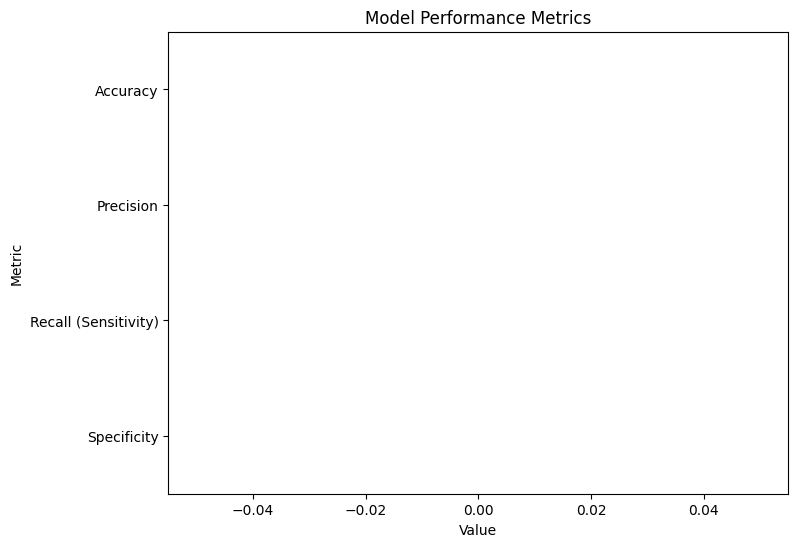

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las etiquetas verdaderas y las predicciones del modelo
y_true = validation_generator.labels
y_pred = np.round(model.predict(validation_generator))

# Calcular las métricas
accuracy = (y_true == y_pred).mean()
precision = np.sum((y_pred == 1) & (y_true == y_pred)) / np.sum(y_pred == 1)
recall = np.sum((y_pred == 1) & (y_true == y_pred)) / np.sum(y_true == 1)
specificity = np.sum((y_pred == 0) & (y_true == y_pred)) / np.sum(y_true == 0)

# Crear un gráfico de barras para mostrar las métricas
metrics = ['Accuracy', 'Precision', 'Recall (Sensitivity)', 'Specificity']
values = [accuracy, precision, recall, specificity]

plt.figure(figsize=(8, 6))
sns.barplot(x=values, y=metrics)
plt.xlabel('Value')
plt.ylabel('Metric')
plt.title('Model Performance Metrics')
plt.show()



En este código, debes reemplazar 'ruta_de_la_imagen.jpg' con la ruta de la imagen que deseas preprocesar y mostrar. Asegúrate de que la imagen esté en un formato compatible, como JPEG.

El código carga la imagen utilizando image.load_img() de Keras y la redimensiona al tamaño requerido por el modelo (en este caso, 150x150 píxeles). Luego, la imagen se convierte en un arreglo numpy utilizando image.img_to_array() y se normaliza dividiendo por 255.0 para asegurar que los valores estén en el rango [0, 1]. Luego, se expande la dimensión del arreglo para que coincida con la forma de entrada esperada por el modelo.

A continuación, se utiliza model.predict() para obtener la predicción del modelo para la imagen preprocesada. Dependiendo del valor de la predicción, se asigna una etiqueta de "benigno" o "maligno".

Finalmente, se muestra la imagen preprocesada utilizando plt.imshow(), junto con el título que indica la predicción del modelo. La función plt.axis('off') se utiliza para ocultar los ejes del gráfico.

Recuerda que este código muestra solo una imagen preprocesada a la vez. Si deseas mostrar varias imágenes, puedes adaptar el código en un bucle para cargar y preprocesar múltiples imágenes.








1/1 [==============================] - 0s 85ms/step


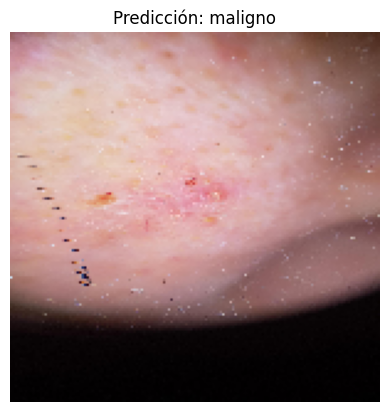

In [27]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Ruta de la imagen que deseas preprocesar
image_path = '/content/entrenamiento/benigno/ISIC_6800726.JPG'

# Cargar y preprocesar la imagen
img = image.load_img(image_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
preprocessed_img = np.expand_dims(img_array, axis=0)

# Obtener la predicción del modelo para la imagen preprocesada
prediction = model.predict(preprocessed_img)
prediction_label = "benigno" if prediction[0][0] < 0.5 else "maligno"

# Mostrar la imagen preprocesada
plt.imshow(img)
plt.title("Predicción: {}".format(prediction_label))
plt.axis('off')
plt.show()


Si deseas mostrar una imagen segmentada del modelo anterior, es necesario utilizar técnicas de segmentación específicas. Una de las técnicas populares de segmentación es la Segmentación por Umbralización (Thresholding). A continuación, te proporciono un ejemplo de cómo mostrar una imagen segmentada utilizando esta técnica:

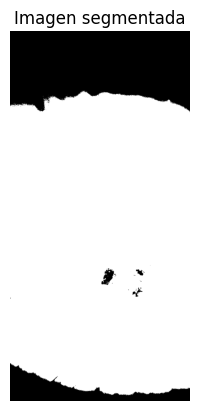

In [29]:
import matplotlib.pyplot as plt
import cv2

# Ruta de la imagen que deseas segmentar
image_path = '/content/entrenamiento/benigno/ISIC_2368449.JPG'

# Cargar la imagen y convertirla a escala de grises
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicar umbralización para segmentar la imagen
_, segmented_img = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Mostrar la imagen segmentada
plt.imshow(segmented_img, cmap='gray')
plt.title("Imagen segmentada")
plt.axis('off')
plt.show()


Para visualizar la arquitectura del modelo anterior en forma de gráfica, puedes utilizar la función plot_model de la biblioteca tensorflow.keras.utils. Aquí tienes un ejemplo de cómo hacerlo:
Este código generará una gráfica que muestra la arquitectura del modelo y la guardará en un archivo llamado "model_architecture.png". La opción show_shapes=True asegura que las formas de entrada y salida de cada capa se muestren correctamente en la gráfica.

Luego, puedes abrir el archivo "model_architecture.png" para ver la gráfica que muestra la arquitectura del modelo en detalle.

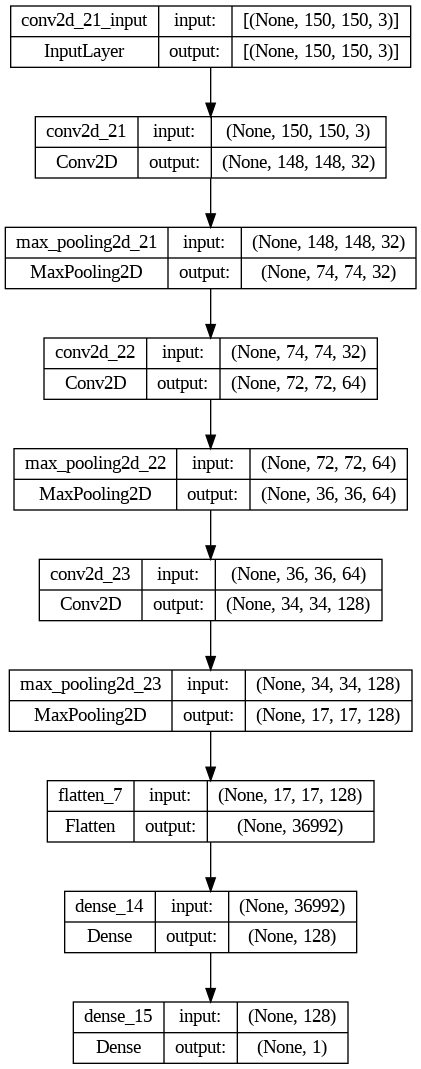

In [30]:
from tensorflow.keras.utils import plot_model

# Visualizar la arquitectura del modelo en una gráfica
plot_model(model, to_file='model_architecture.png', show_shapes=True)


La arquitectura de preprocesamiento de la data del modelo anterior no se especificó en el código proporcionado anteriormente. Sin embargo, puedo mostrarte un ejemplo común de una arquitectura de preprocesamiento utilizando la biblioteca tensorflow.keras.preprocessing.image.ImageDataGenerator. Esta biblioteca es ampliamente utilizada para realizar transformaciones y aumentar la data de imágenes antes de entrenar un modelo de aprendizaje automático. Aquí tienes un ejemplo de cómo visualizar la arquitectura de preprocesamiento:

In [31]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

